## Model 01 : Mult-linear Regression

>This is the model used for hyper parmemter tuning to maximize r sqaure score
>- area
>- bedrooms
>- bathrooms
>- stories
>- hotwaterheating_encoded
>- airconditioning_encoded
>- prefarea_ecoded

In [156]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
house_df = pd.read_csv('../00-data/cleaned_housing.csv')

In [158]:
house_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_log
0,13300000,1.114732,1.415951,1.440365,1.375545,1,0,0,0,1,1.520339,1,0,0,16.403275
1,12250000,1.858191,1.415951,5.461540,2.528201,1,0,0,0,1,2.683077,0,0,0,16.321037
2,12250000,2.340957,0.052722,1.440365,0.222889,1,0,1,0,0,1.520339,1,1,0,16.321037
3,12215000,1.153353,1.415951,1.440365,0.222889,1,0,1,0,1,2.683077,1,0,0,16.318175
4,11410000,1.114732,1.415951,-0.570222,0.222889,1,1,1,0,1,1.520339,0,0,0,16.250001


In [159]:
house_df.drop(columns=['price'])

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_log
0,1.114732,1.415951,1.440365,1.375545,1,0,0,0,1,1.520339,1,0,0,16.403275
1,1.858191,1.415951,5.461540,2.528201,1,0,0,0,1,2.683077,0,0,0,16.321037
2,2.340957,0.052722,1.440365,0.222889,1,0,1,0,0,1.520339,1,1,0,16.321037
3,1.153353,1.415951,1.440365,0.222889,1,0,1,0,1,2.683077,1,0,0,16.318175
4,1.114732,1.415951,-0.570222,0.222889,1,1,1,0,1,1.520339,0,0,0,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,-1.019094,-1.310508,-0.570222,-0.929767,1,0,1,0,0,1.520339,0,0,1,14.414348
539,-1.308754,0.052722,-0.570222,-0.929767,0,0,0,0,0,-0.805137,0,1,0,14.384879
540,-0.719779,-1.310508,-0.570222,-0.929767,1,0,0,0,0,-0.805137,0,0,1,14.375127
541,-1.062543,0.052722,-0.570222,-0.929767,0,0,0,0,0,-0.805137,0,0,0,14.375127


In [160]:
X = house_df.iloc[:, 1:-1]
y = house_df.iloc[:, -1].values
y = y.reshape(len(y),1)

### Spliting the training and test set to a 80:20 proportion

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [162]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared (R2): {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 0.0449
Mean Absolute Error (MAE): 0.1652
R-Squared (R2): 0.7378


### Spliting the traing and test set to a 70:30 proportion

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7004813864098502

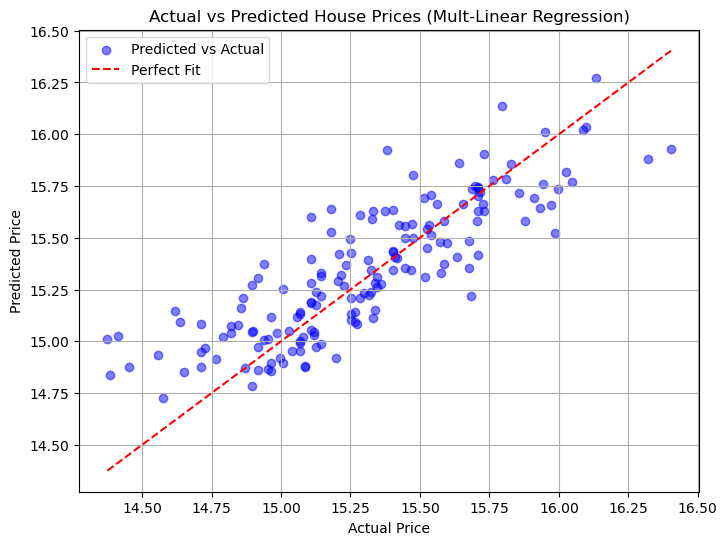

In [166]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Mult-Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()